In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from photoz_utils import *

In [2]:
g_df = pd.read_csv('/data/HSC/HSC_v6/step1/g_band_sextractor/shape_parameters.csv')
r_df = pd.read_csv('/data/HSC/HSC_v6/step1/r_band_sextractor/shape_parameters.csv')
i_df = pd.read_csv('/data/HSC/HSC_v6/step1/i_band_sextractor/shape_parameters.csv')
z_df = pd.read_csv('/data/HSC/HSC_v6/step1/z_band_sextractor/shape_parameters.csv')
y_df = pd.read_csv('/data/HSC/HSC_v6/step1/y_band_sextractor/shape_parameters.csv')
df_list = [g_df, r_df, i_df, z_df, y_df]

In [3]:
bands = ['g', 'r', 'i', 'z', 'y']
shape_params = ["SPHEROID_SERSICN", "ISOAREA_IMAGE", "FLUX_RADIUS", "MU_MAX", "ELLIPTICITY", "A_IMAGE", "B_IMAGE"]
shape_param_names = ['Sérsic Index', 'Isophotal Area', 'Half-Light Radius', 'Peak Surf. Bright.', 'Ellipticity', 'Major Axis', 'Minor Axis']

In [4]:
for i, band in enumerate(bands):
    for j, param in enumerate(shape_params):
        print(f'{shape_param_names[j]} mean in {band} band: {np.mean(df_list[i][param])}')

Sérsic Index mean in g band: 1.3529721544268352
Isophotal Area mean in g band: 698.7287928463937
Half-Light Radius mean in g band: 6.5126276828642355
Peak Surf. Bright. mean in g band: -4.710081819197558
Ellipticity mean in g band: 0.23019471999050284
Major Axis mean in g band: 5.530597923889931
Minor Axis mean in g band: 3.8561750727127344
Sérsic Index mean in r band: 1.5147474275578645
Isophotal Area mean in r band: 882.8278043721914
Half-Light Radius mean in r band: 6.353572065041671
Peak Surf. Bright. mean in r band: -5.792961800412709
Ellipticity mean in r band: 0.2314745409408487
Major Axis mean in r band: 6.0228697630245716
Minor Axis mean in r band: 4.250125034479628
Sérsic Index mean in i band: 1.9038192569160022
Isophotal Area mean in i band: 957.121012147304
Half-Light Radius mean in i band: 5.774581328277486
Peak Surf. Bright. mean in i band: -6.672759297628152
Ellipticity mean in i band: 0.24272955052531237
Major Axis mean in i band: 6.083098634432143
Minor Axis mean in i 

/opt/anaconda3/envs/jupyterhub/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


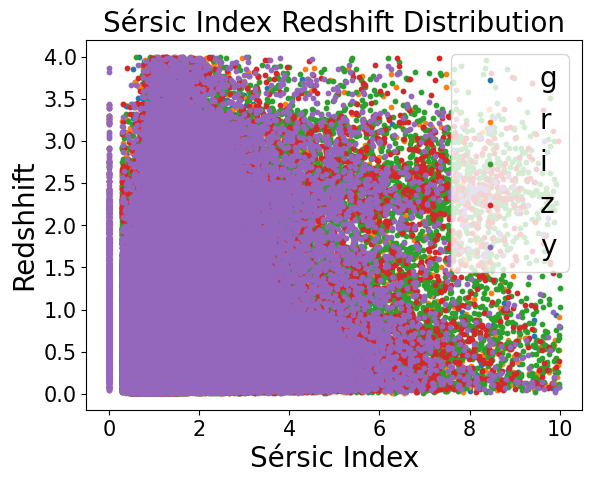

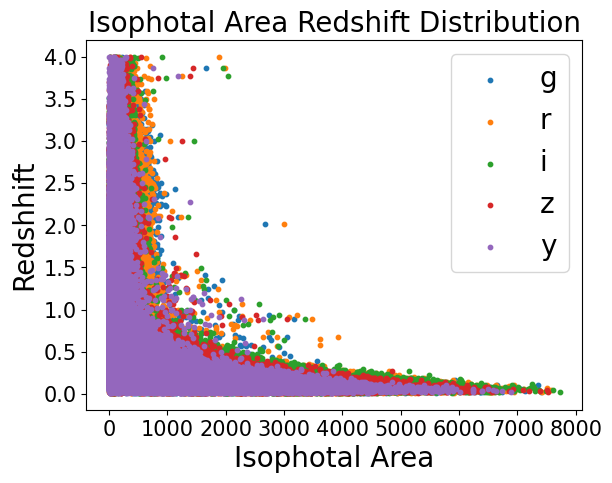

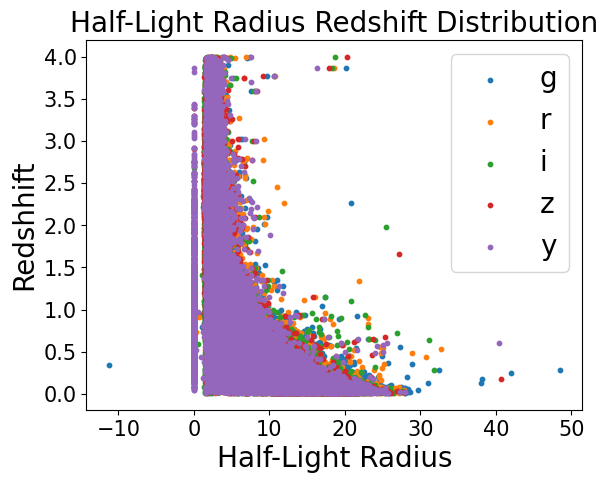

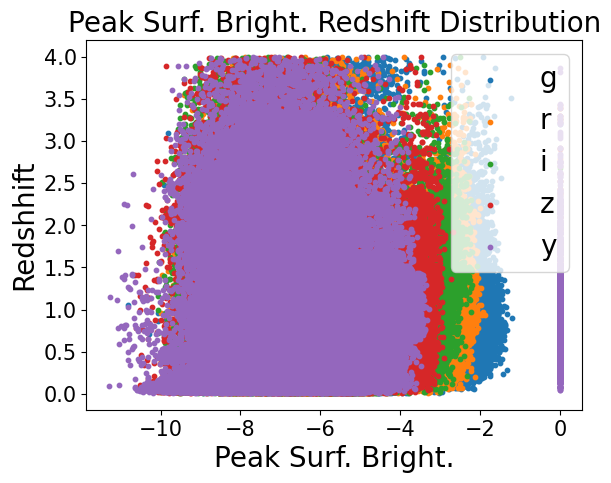

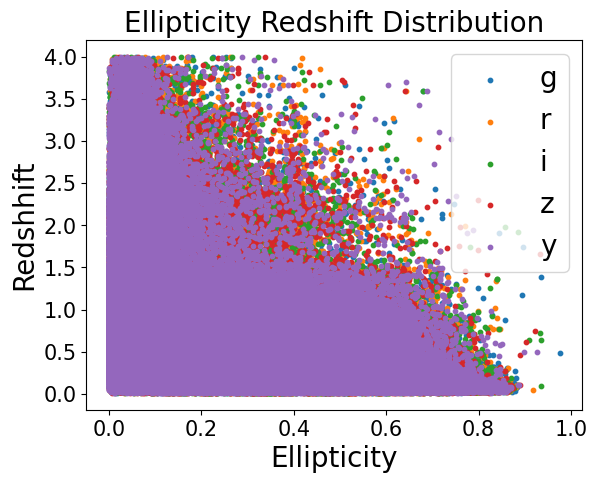

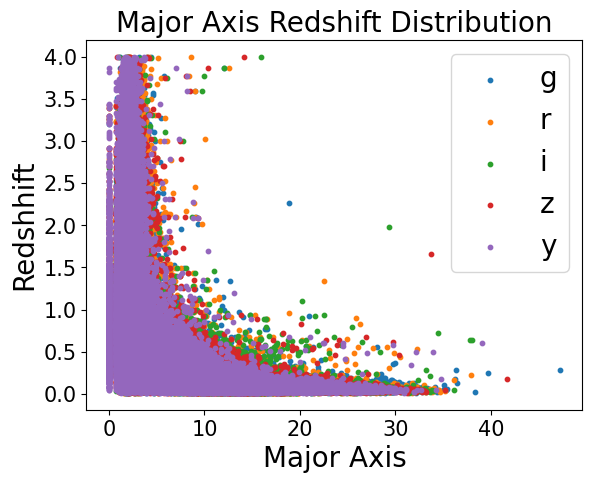

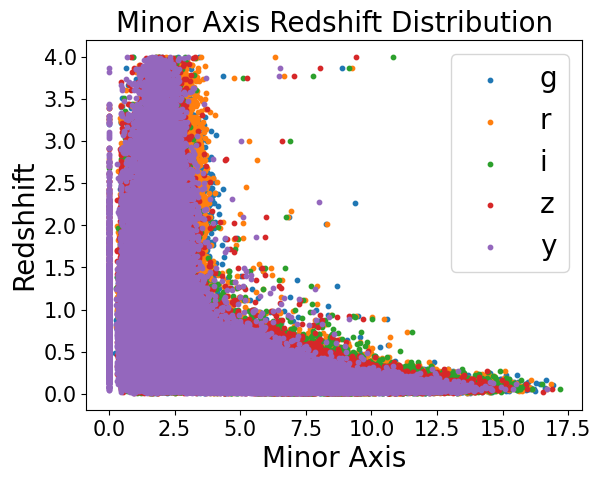

In [5]:
for i, param in enumerate(shape_params):
    plt.figure()
    for j, df in enumerate(df_list):
        plt.scatter(df[param], df['specz'], label=f'{bands[j]}', s=10, alpha=1)
        plt.xlabel(f'{shape_param_names[i]}', fontsize=20)
        plt.ylabel('Redshhift', fontsize=20)
    plt.legend(fontsize=20)
    plt.title(f'{shape_param_names[i]} Redshift Distribution', fontsize=20)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.show()    

In [6]:
df = g_df # choose a band
pct50 = df[shape_params].describe().loc['50%']
pct50

SPHEROID_SERSICN      1.2250
ISOAREA_IMAGE       261.0000
FLUX_RADIUS           5.6670
MU_MAX               -4.5468
ELLIPTICITY           0.1900
A_IMAGE               3.9230
B_IMAGE               3.0390
Name: 50%, dtype: float64

In [7]:
for i, param in enumerate(shape_params):
    print(f'{len(df[(df[param] > pct50[param]) & (df["specz"] < 1.5)]) / len(df[df[param] > pct50[param]])*100}% of sources above the 50th percentile of {shape_param_names[i]} are at z < 1.5.')

95.03758137975356% of sources above the 50th percentile of Sérsic Index are at z < 1.5.
95.48811761499815% of sources above the 50th percentile of Isophotal Area are at z < 1.5.
99.97346016580411% of sources above the 50th percentile of Half-Light Radius are at z < 1.5.
98.51881337467528% of sources above the 50th percentile of Peak Surf. Bright. are at z < 1.5.
99.1143430150204% of sources above the 50th percentile of Ellipticity are at z < 1.5.
99.86520840317354% of sources above the 50th percentile of Major Axis are at z < 1.5.
99.1291169651088% of sources above the 50th percentile of Minor Axis are at z < 1.5.


In [8]:
for i, df in enumerate(df_list):
    print(f'{(len(df[df["NUMBER_IN_CENTER_10PX_DIAMETER"] > 1]) / len(df))}% of images in the {bands[i]} band were crowded with a 10px diameter in the g band. Raw number: {len(df[df["NUMBER_IN_CENTER_10PX_DIAMETER"] > 1])}')
    print(f'{(len(df[df["NUMBER_IN_CENTER_20PX_DIAMETER"] > 1]) / len(df))}% of images in the {bands[i]} band were crowded with a 20px diameter in the g band. Raw number: {len(df[df["NUMBER_IN_CENTER_20PX_DIAMETER"] > 1])}')
    print(f'{(len(df[df["NUMBER_IN_CENTER_30PX_DIAMETER"] > 1]) / len(df))}% of images in the {bands[i]} band were crowded with a 30px diameter in the g band. Raw number: {len(df[df["NUMBER_IN_CENTER_30PX_DIAMETER"] > 1])}')

0.011654987238173051% of images in the g band were crowded with a 10px diameter in the g band. Raw number: 3338
0.027587194178791276% of images in the g band were crowded with a 20px diameter in the g band. Raw number: 7901
0.0438057129688793% of images in the g band were crowded with a 30px diameter in the g band. Raw number: 12546
0.011326776093658892% of images in the r band were crowded with a 10px diameter in the g band. Raw number: 3244
0.02823663325197887% of images in the r band were crowded with a 20px diameter in the g band. Raw number: 8087
0.04600891756662861% of images in the r band were crowded with a 30px diameter in the g band. Raw number: 13177
0.014678719697207762% of images in the i band were crowded with a 10px diameter in the g band. Raw number: 4204
0.036347638450983065% of images in the i band were crowded with a 20px diameter in the g band. Raw number: 10410
0.05878471094723831% of images in the i band were crowded with a 30px diameter in the g band. Raw number:

/tmp/ipykernel_808897/3680912121.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('viridis')


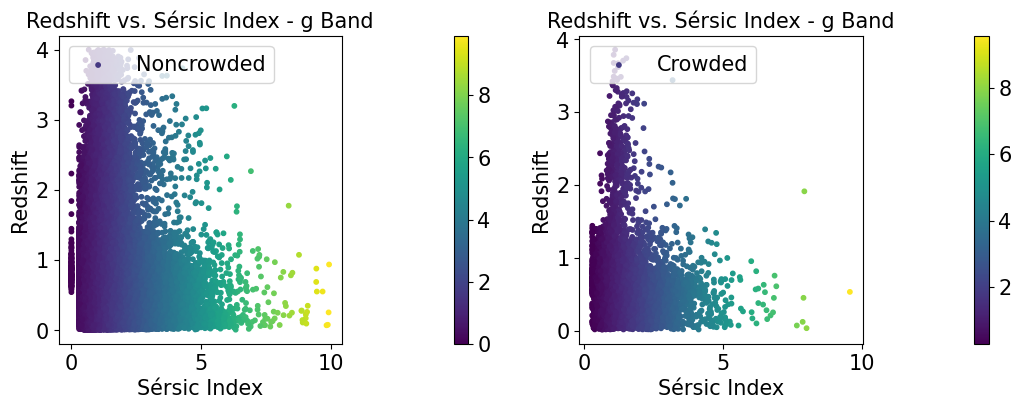

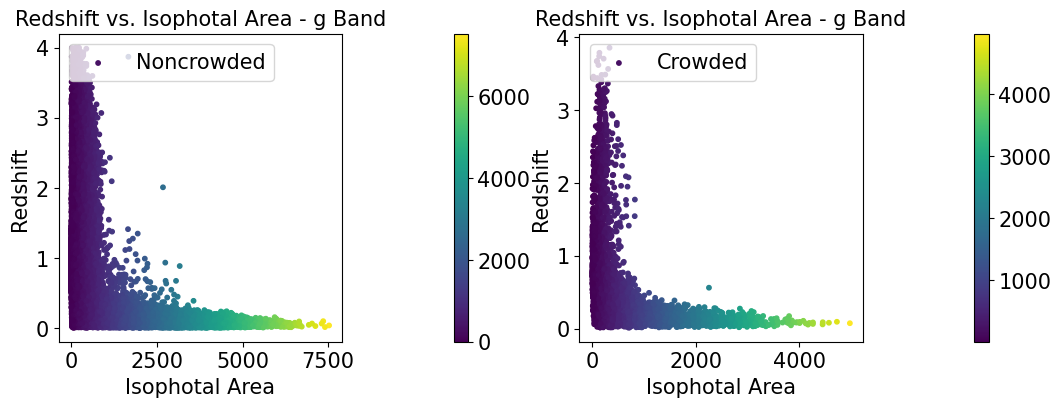

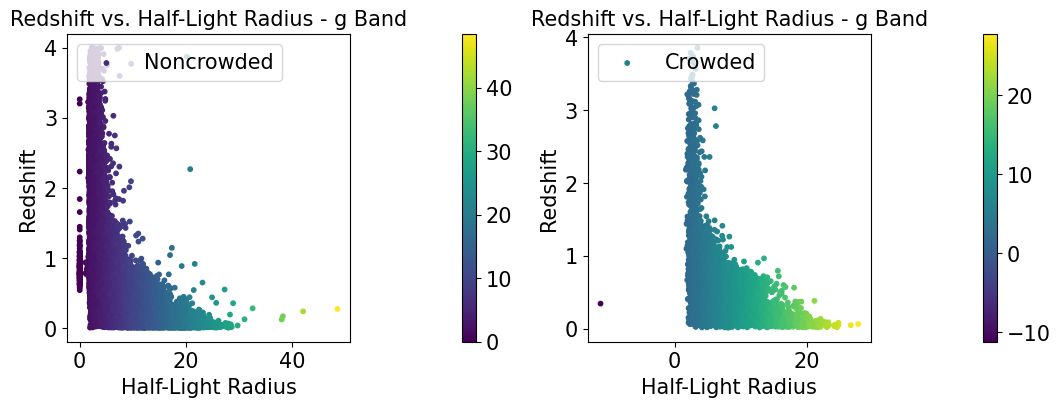

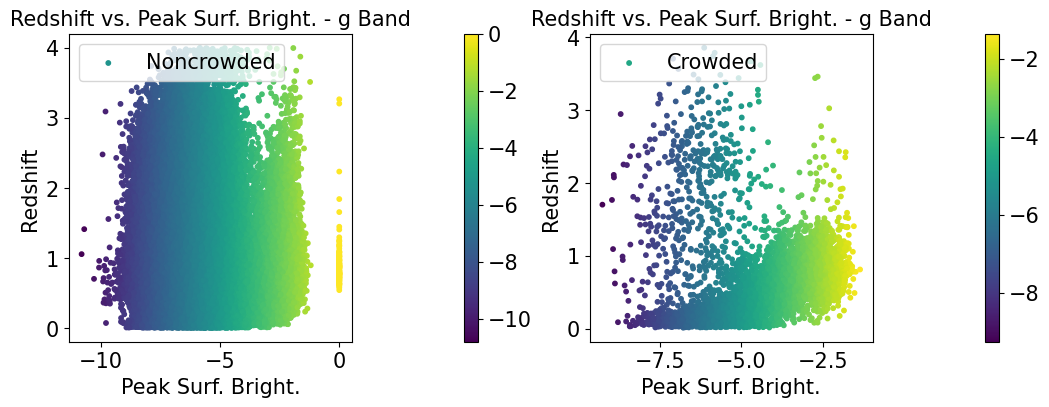

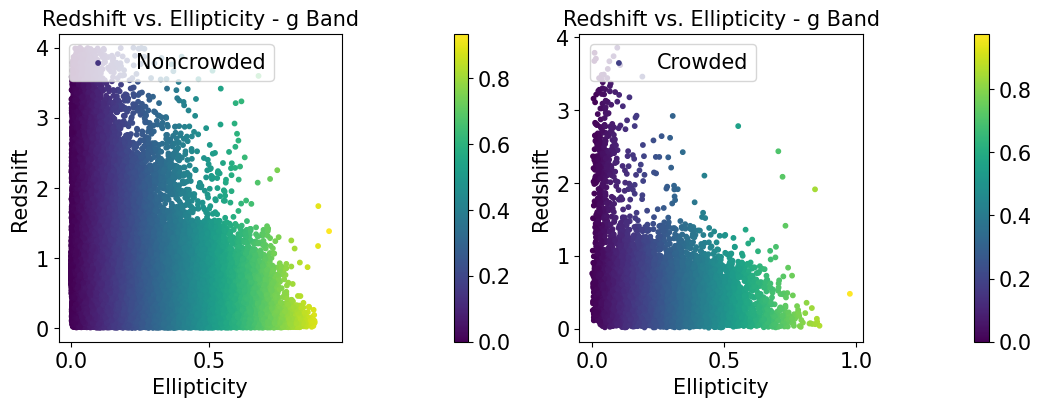

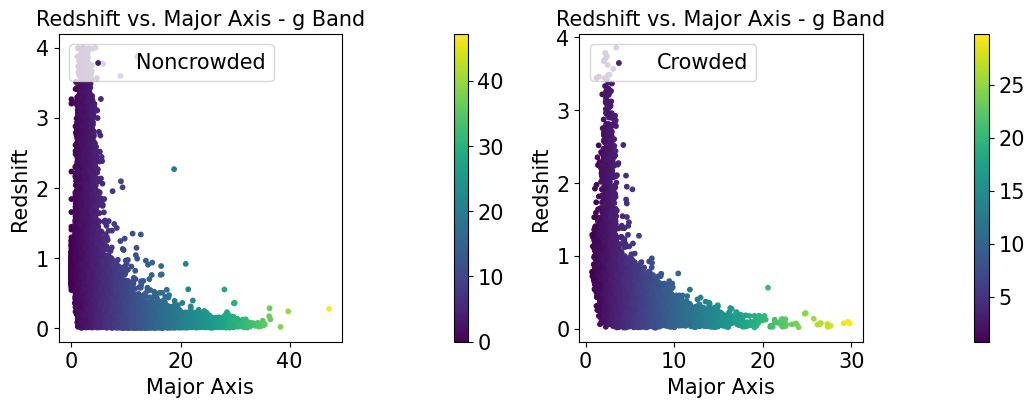

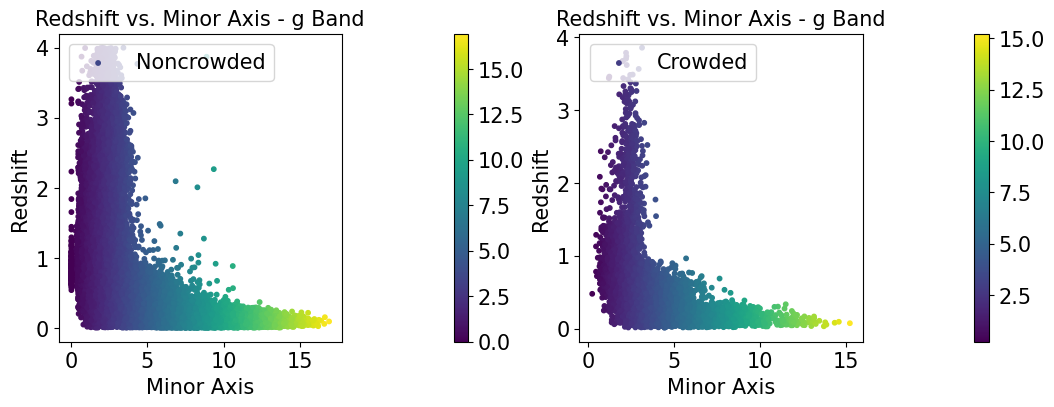

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

df = g_df  # pick one dataframe to plot
noncrowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] <= 1]
crowded_df = df[df['NUMBER_IN_CENTER_30PX_DIAMETER'] > 1]

cmap = cm.get_cmap('viridis')
labels = ['Noncrowded', 'Crowded']

for i, shape_param in enumerate(shape_params):
    fig, (ax1, cax1, ax2, cax2) = plt.subplots(1, 4, figsize=(12, 4), gridspec_kw={'width_ratios': [1, 0.05, 1, 0.05]})

    # Plot for noncrowded_df
    sc1 = ax1.scatter(noncrowded_df[shape_param], noncrowded_df['specz'], s=10, c=noncrowded_df[shape_param], cmap=cmap, label=labels[0])
    cbar1 = plt.colorbar(sc1, cax=cax1)
    cbar1.ax.tick_params(labelsize=15) 
    ax1.legend(loc='upper left', fontsize=15)
    ax1.set_title(f'Redshift vs. {shape_param_names[i]} - g Band', fontsize=15)
    ax1.set_xlabel(shape_param_names[i], fontsize=15)
    ax1.set_ylabel('Redshift', fontsize=15)
    ax1.tick_params(axis='x', labelsize=15)
    ax1.tick_params(axis='y', labelsize=15)

    # Plot for crowded_df
    sc2 = ax2.scatter(crowded_df[shape_param], crowded_df['specz'], s=10, c=crowded_df[shape_param], cmap=cmap, label=labels[1])
    cbar2 = plt.colorbar(sc2, cax=cax2)
    cbar2.ax.tick_params(labelsize=15)
    ax2.legend(loc='upper left', fontsize=15)
    ax2.set_title(f'Redshift vs. {shape_param_names[i]} - g Band', fontsize=15)
    ax2.set_xlabel(shape_param_names[i], fontsize=15)
    ax2.set_ylabel('Redshift', fontsize=15)
    ax2.tick_params(axis='x', labelsize=15)
    ax2.tick_params(axis='y', labelsize=15)

    plt.subplots_adjust(wspace=0.75, hspace=0.2)  # Adjust the spacing between subplots
    plt.show()


In [10]:
print(f'{len(df[df["NUMBER_IN_CENTER_30PX_DIAMETER"] > 1]) / len(df)}')

0.0438057129688793


In [11]:
print(f'{len(df[df["NUMBER_IN_CENTER_20PX_DIAMETER"] > 1]) / len(df)}')

0.027587194178791276


In [12]:
print(f'{len(df[df["NUMBER_IN_CENTER_10PX_DIAMETER"] > 1]) / len(df)}')

0.011654987238173051
